# A Simple linear regression model that estimates the relationship between one independent variable and one dependent variable

The advertising data set used consists of the sales of a product in 200 different markets, along with advertising budgets for three different media (TV, radio, newspaper). The sales column depicts the number of units sold in 1000. The other columns depict the budget in $1000.

In [8]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [9]:
#Importing data
advertising_data = pd.read_csv ("Advertising.csv")

In [10]:
#to view data
#note : sales (*1000 units) vs Advertising budget (*1000usd)
advertising_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The first row of the data shows that the advertising budgets for TV, radio, and newspaper were $230.1k, $37.8k, and $69.2k respectively, and the corresponding number of units that were sold was 22.1k.

## Describing data

In [11]:
#Desribing data
advertising_data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [13]:
advertising_data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
advertising_data.index

RangeIndex(start=0, stop=200, step=1)

In [14]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [51]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
len(advertising_data)

200

## Viewing and Selecting data

In [26]:
advertising_data.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

## Visualizing the Data

Scatter Plot of Sales(*1000 units) vs Advertising Budgets (*1000usd) for TV, Newspaper and Radio respectively


In [16]:
advertising_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


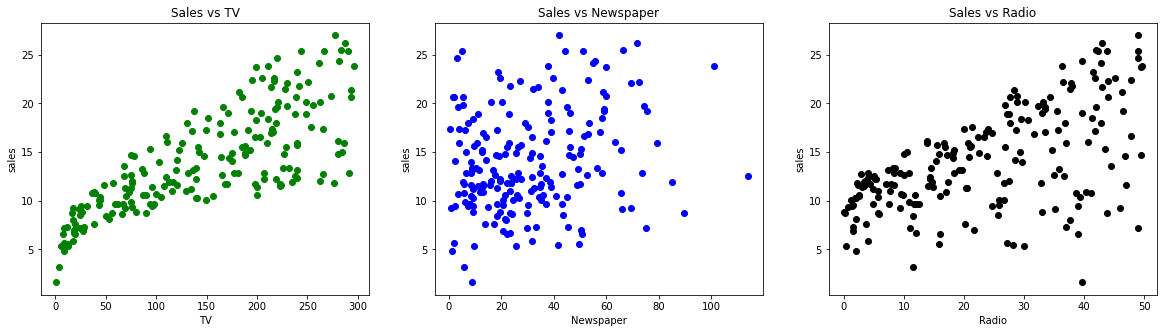

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize =(20, 5))
ax1.scatter(advertising_data ["TV"] , advertising_data ["sales"], color="green")
ax1.set(title ="Sales vs TV", xlabel = "TV", ylabel = "sales")

ax2.scatter (advertising_data ["newspaper"], advertising_data ["sales"], color="blue")
ax2.set(title ="Sales vs Newspaper", xlabel = "Newspaper",ylabel = "sales")

ax3.scatter (advertising_data ["radio"], advertising_data ["sales"], color = "black")
ax3.set(title ="Sales vs Radio", xlabel = "Radio", ylabel = "sales");


From the first plot and third plot,one can deduce that there’s a sharp increase in sales as TV and Radio advertising budgets are increased. This shows that there is a relationship/correlation between both variables. However, in the second graph the trend is not much defined. This signifies, no correlation.

## Building the model
Linear Regression model for the "TV" column

→ 𝑆𝑎𝑙𝑒𝑠 = a + b * 𝑇𝑉

In [90]:
#Defining x and y
x1 = advertising_data["TV"].values.reshape(-1, 1)
y1 = advertising_data["sales"].values.reshape(-1,1)


In [91]:
#splitting data into train and test datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)


In [96]:
# Fitting the Linear Regression Model
Model = LinearRegression()
Model = Model.fit(x1_train, y1_train)

In [97]:
#retrieving intercept and slope
print(Model.intercept_)
print(Model.coef_)

[7.29249377]
[[0.04600779]]


In [70]:
#Retrieving and storing results for test
train_fit = Model.predict(x_train)
test_pred = Model.predict(x_test)

## Visualize the Regression Line on top of Training and Testing Dataset ("TV")

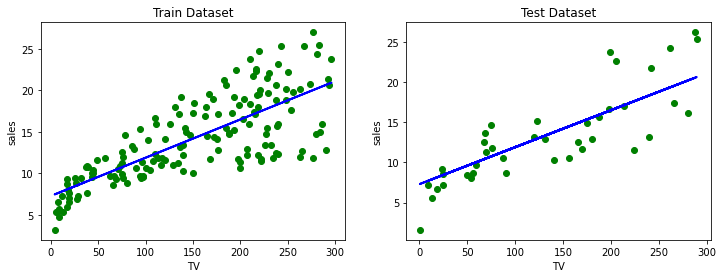

In [71]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, train_fit, color='blue', linewidth=2)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title("Train Dataset")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, test_pred, color='blue', linewidth=2)
plt.xlabel('TV')
plt.ylabel('sales')
plt.title("Test Dataset")

plt.show()

The regression model finds the best straight line that can represent the data in the best possible way by adjusting the intercept and coefficients.


## Error Evaluation

The error function can be considered as the distance between the current state and the ideal state. A model starts with an initial state where it assumes some value of parameters involved and thereby adjusting those parameters to reduce the error function.

In this case, the intercept and the advertising coefficient are the parameters to be adjusted, whereas the error function is the overall difference between the actual sales and the predicted sales.

The points that lie on the line or very closer to it are the ones that the model was able to predict correctly. However, there are many points that lie away from the regression line. The distance of every such point from the straight line accounts for the error.

In [15]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))

Mean Squared Error: 10.186181934530211
Root Mean Squared Error: 3.1915798493113425
Mean Absolute Error: 2.505418178966002


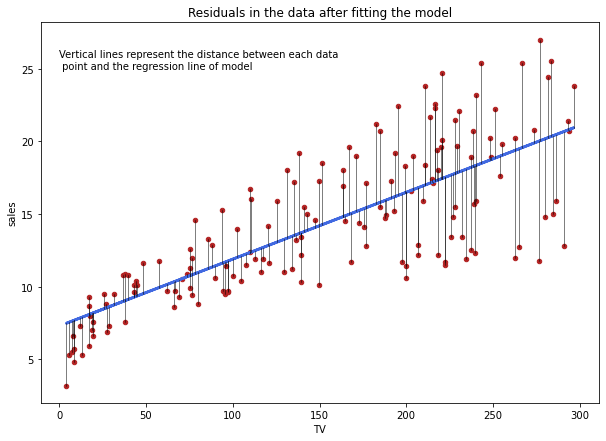

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train,  color='firebrick', s=20)
plt.plot(x_train, train_fit, color='royalblue', linewidth=2.7)
for i in range(x_train.shape[0]):
    plt.plot([x_train[i], x_train[i]], [y_train[i], train_fit[i]], color='black', linewidth=0.5)
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("Residuals in the data after fitting the model")
plt.text(0, 25, "Vertical lines represent the distance between each data \n point and the regression line of model")
plt.show()


In [44]:
#Linear Regression model for the "newspaper" column
#Defining x and y
x = advertising_data["newspaper"].values.reshape(-1, 1)
y = advertising_data["sales"].values.reshape(-1,1)


In [39]:
#splitting data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [41]:
# Fitting the Linear Regression Model
Model = LinearRegression()
Model = Model.fit(x_train, y_train)

In [45]:
#Retrieving and storing results for test
train_fit = Model.predict(x_train)
test_pred = Model.predict(x_test)

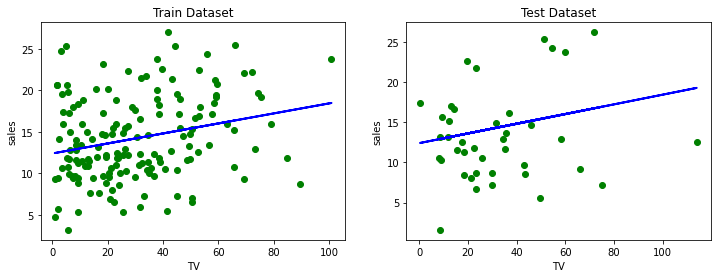

In [46]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, train_fit, color='blue', linewidth=2)
plt.xlabel('Newspaper')
plt.ylabel('sales')
plt.title("Train Dataset")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, test_pred, color='blue', linewidth=2)
plt.xlabel('Newspaper')
plt.ylabel('sales')
plt.title("Test Dataset")

plt.show()

In [72]:
#Linear Regression model for the "radio" column
#Defining x and y
x = advertising_data["radio"].values.reshape(-1, 1)
y = advertising_data["sales"].values.reshape(-1,1)


In [73]:
#splitting data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [74]:
# Fitting the Linear Regression Model
Model = LinearRegression()
Model = Model.fit(x_train, y_train)

In [76]:
#Retrieving and storing results for test
train_fit = Model.predict(x_train)
test_pred = Model.predict(x_test)

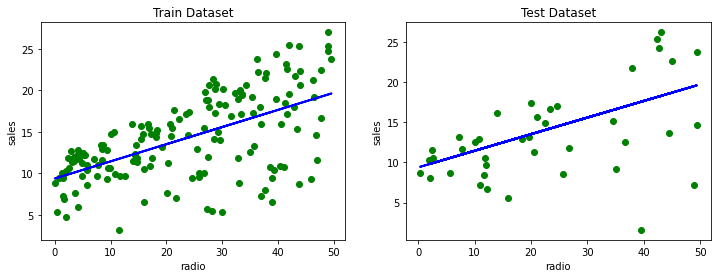

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, train_fit, color='blue', linewidth=2)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title("Train Dataset")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, test_pred, color='blue', linewidth=2)
plt.xlabel('radio')
plt.ylabel('sales')
plt.title("Test Dataset")

plt.show()